# Hands-On Decision Forest Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 


## 1. Load Dataset

In [2]:
path='../dataset/bank-additional/bank-additional-full.csv'
df=pd.read_csv(path,sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
#assign non object columns to a new list
num_cols = df.select_dtypes(include=[np.number]).columns
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [4]:
## check imbalance label
def check_imbalance(df, label):
    count = df[label].value_counts()
    percent = round(df[label].value_counts(normalize=True) * 100, 2)
    df = pd.DataFrame({'count': count, 'percent': percent})
    return df

check_imbalance(df,'y')    

,count,percent
y,,
no,36548,88.73
yes,4640,11.27


## 2. Preprocessing Data

### 2.1 Handling Missing Values

In [5]:
df=df.dropna()

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 2.2 Encoding Categorical Features

In [8]:
label_encoder=LabelEncoder()
categorical_cols=df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col]=label_encoder.fit_transform(df[col])

### 2.3 Splitting Features and Target

In [9]:
X=df.drop('y',axis=1)
y=df['y']

In [10]:
## smote oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Check class distribution before SMOTE
print("Before SMOTE:", np.bincount(y))

# Check class distribution after SMOTE
print("After SMOTE:", np.bincount(y_sm))

Before SMOTE: [36548  4640]
After SMOTE: [36548 36548]


In [12]:
## Standardize the numerical data
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X_sm[num_cols] = scaler.fit_transform(X_sm[num_cols])





### 2.4 Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm,y_sm,test_size=0.3,random_state=42)

In [18]:
print(len(X_train),len(X_test))
print(len(X_train_sm),len(X_test_sm))

28831 12357
51167 21929


## 3. Build Model

### 3.1 Train Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(max_depth=4,random_state=42)
clf.fit(X_train,y_train)

#with smote
clf01=DecisionTreeClassifier(max_depth=4,random_state=42)
clf01.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier(max_depth=4, random_state=42)

### 3.2 Train Random Forest Classifier

In [21]:
## train random forest classifier
from sklearn.ensemble import RandomForestClassifier

clf2=RandomForestClassifier(n_estimators=100,random_state=1,max_depth=5)
clf2.fit(X_train,y_train)


RandomForestClassifier(max_depth=5, random_state=1)

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a base model
rf_model = RandomForestClassifier(random_state=1)

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,                  # 5-fold cross-validation
    scoring='accuracy',    # you can change this metric
    n_jobs=-1,            # use all available cores
    verbose=2
)

# Fit the grid search
grid_search.fit(X_train_sm, y_train_sm)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\Najwa\miniconda3\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best cross-validation score: 0.8956945499354966


In [25]:
## random forest with smote
clf21=RandomForestClassifier(n_estimators=300,random_state=1,max_depth=5)
clf21.fit(X_train_sm,y_train_sm)

RandomForestClassifier(max_depth=5, n_estimators=300, random_state=1)

### 3.3 Train XGBoost Classifier

In [53]:
## train Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

clf3=GradientBoostingClassifier(n_estimators=100,random_state=2)
clf3.fit(X_train,y_train)

GradientBoostingClassifier(random_state=2)

In [55]:
clf31=GradientBoostingClassifier(n_estimators=1000,random_state=2)
clf31.fit(X_train_balanced,y_train_balanced)

GradientBoostingClassifier(n_estimators=1000, random_state=2)

### 3.4 Ensemble Learning with Multiple Classifiers

In [26]:
### train model
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

#### 3.4.1 Define individuals Classifier

In [28]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier(max_depth=10, random_state=42)
clf3 = RandomForestClassifier(n_estimators=100, max_depth=10,
random_state=42)

#### 3.4.2 Combine Model in Voting Ensemble

In [29]:
ensemble = VotingClassifier(estimators=[
('lr', clf1),
('dt', clf2),
('rf', clf3)
], voting='hard')

In [30]:
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)

## 4. Model Evaluation

### 4.1 Evaluation Metrix

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def evaluate_model(clf,X_test,y_test):
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    conf_matrix=confusion_matrix(y_test,y_pred)
    class_report=classification_report(y_test,y_pred)
    print('Accuracy:\n',accuracy)
    print('Confusion Matrix:\n',conf_matrix)
    print('Classification Report:\n',class_report)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

def evaluate_model(clf,X_test,y_test):
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    conf_matrix=confusion_matrix(y_test,y_pred)
    class_report=classification_report(y_test,y_pred)
    print('Accuracy:\n',accuracy)
    print('Confusion Matrix:\n',conf_matrix)
    print('Classification Report:\n',class_report)
    #return accuracy,conf_matrix,class_report


## evaluate decision tree
print('===========Decision Tree:===========')
evaluate_model(clf,X_test,y_test)




===========Decision Tree:===========
Accuracy:
 0.9121955167111758
Confusion Matrix:
 [[10638   330]
 [  755   634]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.66      0.46      0.54      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.71      0.75     12357
weighted avg       0.90      0.91      0.91     12357



In [85]:
## evaluate random forest
print('===========Random Forest:=============')
evaluate_model(clf2,X_test,y_test)


===========Random Forest:=============
Accuracy:
 0.9129238488306223
Confusion Matrix:
 [[10586   382]
 [  694   695]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.65      0.50      0.56      1389

    accuracy                           0.91     12357
   macro avg       0.79      0.73      0.76     12357
weighted avg       0.91      0.91      0.91     12357



In [30]:
## evaluate random forest
print('===========Random Forest with SMOTE:=============')
evaluate_model(clf21,X_test_sm,y_test_sm)

===========Random Forest with SMOTE:=============
Accuracy:
 0.894705640932099
Confusion Matrix:
 [[ 9337  1668]
 [  641 10283]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89     11005
           1       0.86      0.94      0.90     10924

    accuracy                           0.89     21929
   macro avg       0.90      0.89      0.89     21929
weighted avg       0.90      0.89      0.89     21929



In [86]:
print('===========Gradient Boosting:=============')
evaluate_model(clf3,X_test,y_test)

===========Gradient Boosting:=============
Accuracy:
 0.9182649510398964
Confusion Matrix:
 [[10640   328]
 [  682   707]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.68      0.51      0.58      1389

    accuracy                           0.92     12357
   macro avg       0.81      0.74      0.77     12357
weighted avg       0.91      0.92      0.91     12357



In [57]:
print('===========Gradient Boosting with SMOTE:=============')
evaluate_model(clf31,X_test,y_test)

===========Gradient Boosting with SMOTE:=============
Accuracy:
 0.9124382940843246
Confusion Matrix:
 [[10399   569]
 [  513   876]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     10968
           1       0.61      0.63      0.62      1389

    accuracy                           0.91     12357
   macro avg       0.78      0.79      0.78     12357
weighted avg       0.91      0.91      0.91     12357



In [37]:
print('===========Voting Classifier:=============')
evaluate_model(ensemble,X_test,y_test)

===========Voting Classifier:=============
Accuracy:
 0.9092012624423403
Confusion Matrix:
 [[10757   211]
 [  911   478]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     10968
           1       0.69      0.34      0.46      1389

    accuracy                           0.91     12357
   macro avg       0.81      0.66      0.71     12357
weighted avg       0.90      0.91      0.90     12357



### 4.2 Visualiziong Decision Tree

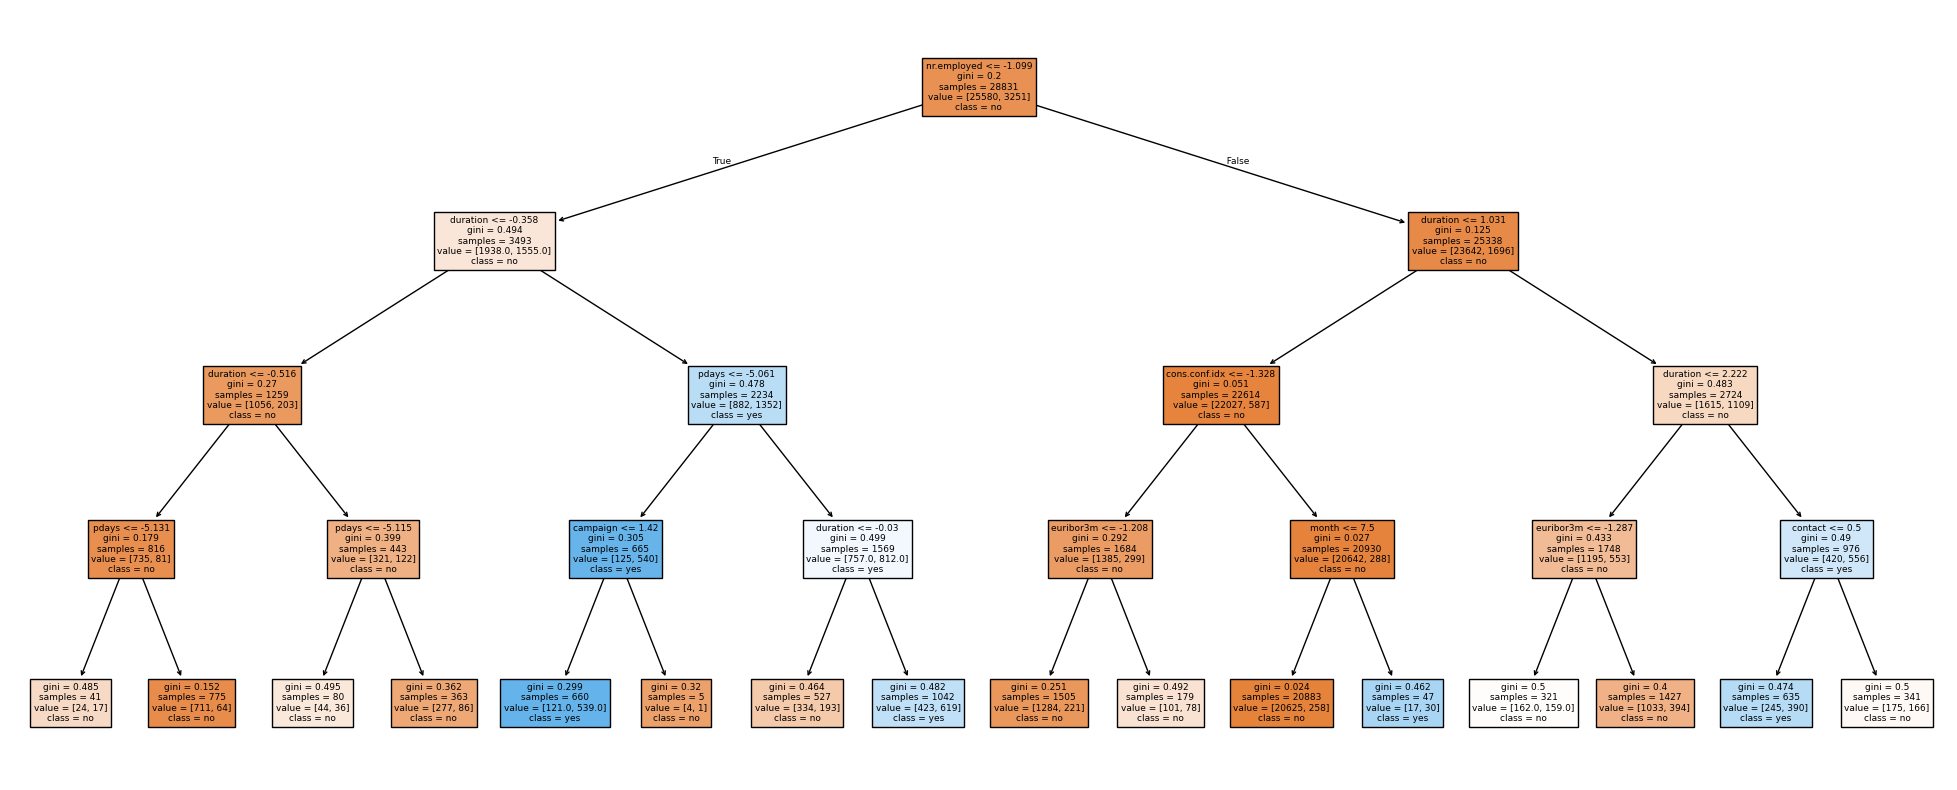

In [60]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))
plot_tree(clf,feature_names=X.columns,class_names=['no','yes'],filled=True)
plt.show()

### 4.3 Feature Important Analysis

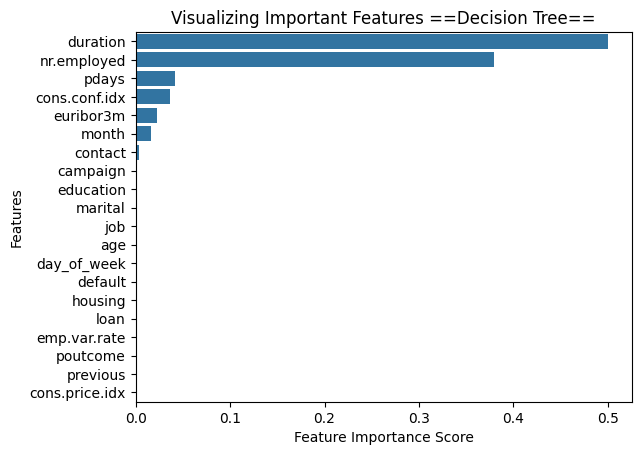

In [80]:
import seaborn as sns

feature_importance=pd.Series(clf.feature_importances_,index=X.columns)
feature_importance=feature_importance.sort_values(ascending=False)
sns.barplot(x=feature_importance,y=feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features ==Decision Tree==')
plt.show()

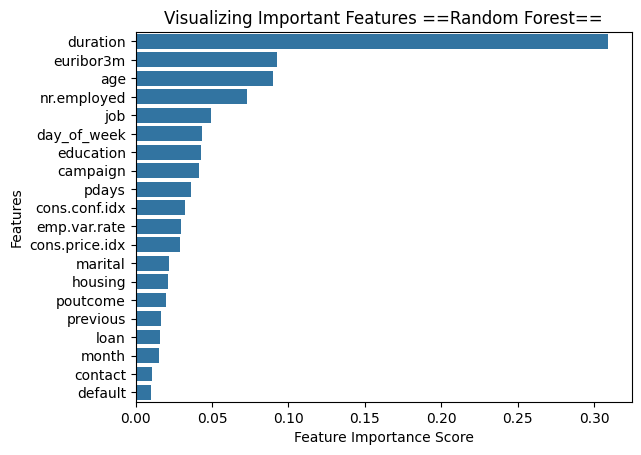

In [81]:
### feature importance for random forest
feature_importance=pd.Series(clf2.feature_importances_,index=X.columns)
feature_importance=feature_importance.sort_values(ascending=False)
sns.barplot(x=feature_importance,y=feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features ==Random Forest==')
plt.show()

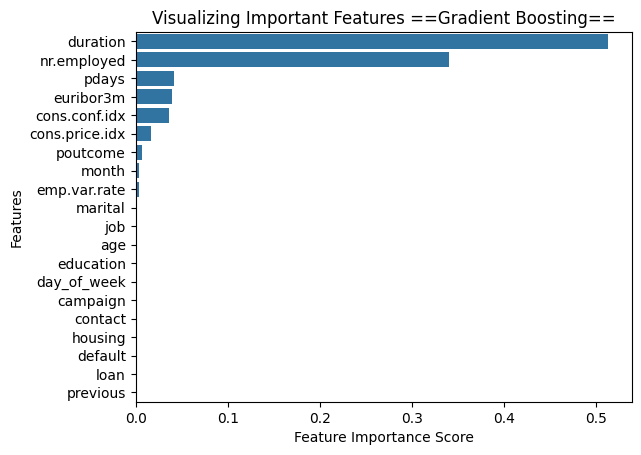

In [82]:
### feature importance for Gradient Boosting
feature_importance=pd.Series(clf3.feature_importances_,index=X.columns)
feature_importance=feature_importance.sort_values(ascending=False)
sns.barplot(x=feature_importance,y=feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features ==Gradient Boosting==')
plt.show()